# Predicting closing price of BTC using RandomForest regression model

# Import libraries

In [53]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from modelwrapper import ModelWrapper

# Prepare train and test data

In [2]:
train = pd.read_csv("data/preprocessed_2014_to_2020.csv")
test = pd.read_csv("data/preprocessed_2021_to_2022.csv")

In this model we will use the `Close_Change_Ratio`, `Open_Change_Ratio` and `Volume` of the past 3 days to predict the `Close_Change_Ratio` of the next day.

In [32]:
INPUT_COLUMNS = ["Close", "Open", "Volume"]  # Columns to use in model wrapper later
TRAINING_COLUMNS = ["Close_Change_Ratio", "Open_Change_Ratio", "Volume"]  # Columns to use to train model
TARGET_COLUMN = "Close_Change_Ratio"  # Value to predict
WINDOW = 3  # Number of days of previous data to use

In [4]:
X_train = pd.DataFrame(columns = [f"{x}_{w}" for x in TRAINING_COLUMNS for w in range(WINDOW)])
for i in range(WINDOW, len(train)):
    X_train.loc[len(X_train)] = [train.at[i - w - 1, x] for x in TRAINING_COLUMNS for w in range(WINDOW)]

y_train = train[TARGET_COLUMN][WINDOW:]

In [5]:
X_test = pd.DataFrame(columns = [f"{x}_{w}" for x in TRAINING_COLUMNS for w in range(WINDOW)])
for i in range(WINDOW, len(test)):
    X_test.loc[len(X_test)] = [test.at[i - w - 1, x] for x in TRAINING_COLUMNS for w in range(WINDOW)]

y_test = test[TARGET_COLUMN][WINDOW:]

# Train model, make predictions

In [6]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Generate predicted closing prices

In [7]:
predicted_closing_prices = pd.DataFrame(columns = ["Close"])

for i in range(len(y_pred)):
    previous_closing_price = test.at[WINDOW + i - 1, "Close"]
    predicted_closing_prices.loc[i] = [previous_closing_price / (1 - y_pred[i])]

# Visualise actual vs predicted close change ratio and close prices

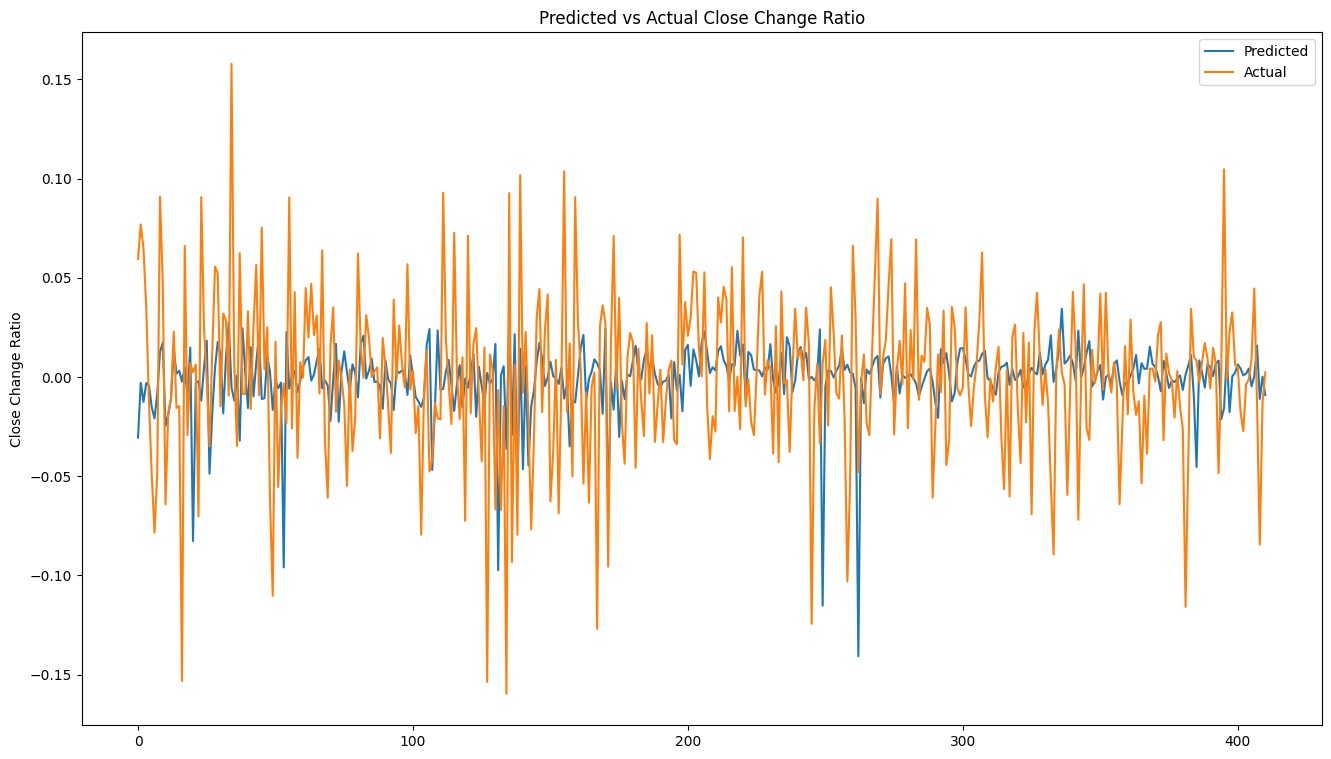

In [11]:
plt.figure(figsize = (16, 9))
plt.plot(range(0, len(y_pred)), y_pred, label = "Predicted")
plt.plot(range(0, len(y_test)), y_test, label = "Actual")
plt.title("Predicted vs Actual Close Change Ratio")
plt.ylabel("Close Change Ratio")
plt.legend()
plt.show()

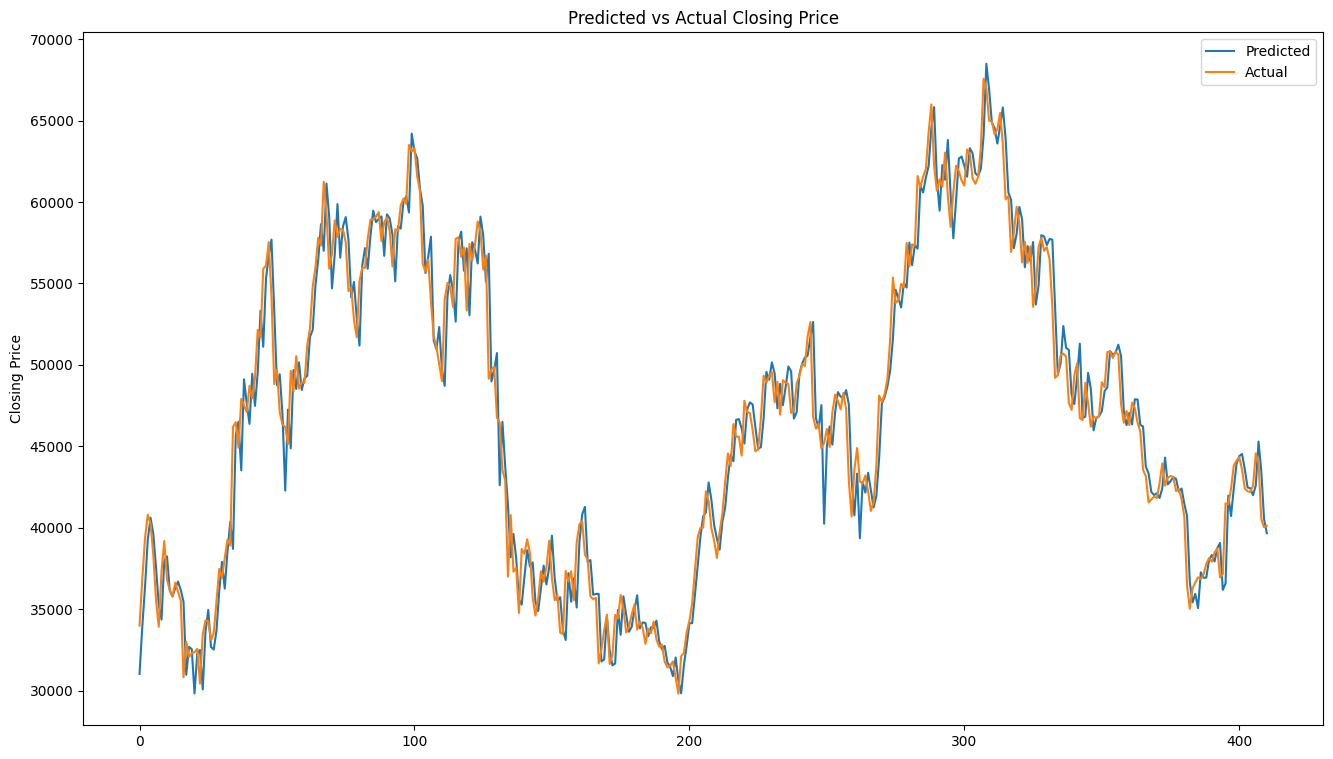

In [12]:
test_closing_prices = test[["Close"]][WINDOW:].reset_index(drop = True)

plt.figure(figsize = (16, 9))
predicted_closing_prices["Close"].plot(label = "Predicted")
test_closing_prices["Close"].plot(label = "Actual")
plt.title("Predicted vs Actual Closing Price")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Calculate RMSE

In [10]:
print("RMSE of predicted close change ratio:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE of predicted closing price: USD", np.sqrt(mean_squared_error(test_closing_prices["Close"], predicted_closing_prices["Close"])))

RMSE of predicted close change ratio: 0.04302751781208018
RMSE of predicted closing price: USD 1947.325956362967


# Wrap model with util functions

In [54]:
w = ModelWrapper(model, WINDOW, INPUT_COLUMNS, TRAINING_COLUMNS)

# Save Model

In [55]:
joblib.dump(w, "model.pkl")

['model.pkl']